# Load in Dataframe

In [1]:
import pandas as pd

file_name = r'/Users/andrewlowe/yipitdata/Q4_2013_Groupon_North_America_Data_XLSX.xlsx'
all_data = pd.read_excel(file_name)

In [2]:
df = all_data
print(df.shape)
df.head()

(138534, 7)


,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party


In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [4]:
# There are the same number of 0s in both rows!

(df == 0).astype(int).sum(axis=0)

Deal ID               0
Units Sold        26774
Billings          26774
Start Date            0
Deal URL              0
Segment               0
Inventory Type        0
dtype: int64

In [5]:
# These shouldn't be included in gross billing, as gross billing DOES NOT include returns.
# There is also not yet data for returns in 4Q2013.  

negative = df[(df['Billings'] < 0)]
print(negative.shape)
negative.head(-5)

(4374, 7)


,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
15,ultimate-tint,-8.30,-1236.70,2012-08-20,http://www.groupon.com/deals/ultimate-tint,Local,Third - Party
16,sterling-house-cleaners-barrie-on,-5.15,-437.75,2012-08-20,http://www.groupon.com/deals/sterling-house-cl...,Local,Third - Party
40,the-vanity-center-3,-10.90,-643.10,2012-09-03,http://www.groupon.com/deals/the-vanity-center-3,Local,Third - Party
81,sunrise-hair-studio-3,-10.90,-752.10,2012-09-14,http://www.groupon.com/deals/sunrise-hair-stud...,Local,Third - Party
125,trio-restaurant-bakery-market,-110.50,-3155.60,2012-09-18,http://www.groupon.com/deals/trio-restaurant-b...,Local,Third - Party
...,...,...,...,...,...,...,...
109373,xtreme-clean-llc,-2.90,-461.10,2013-04-12,http://www.groupon.com/deals/xtreme-clean-llc,Local,Third - Party
109463,yogurt-shack-denver,-10.90,-54.50,2012-12-15,http://www.groupon.com/deals/yogurt-shack-denver,Local,Third - Party
109485,you-call-we-haul-2,-12.40,-1674.00,2013-03-15,http://www.groupon.com/deals/you-call-we-haul-2,Local,Third - Party
109493,young-s-nail,-10.15,-448.05,2013-08-09,http://www.groupon.com/deals/young-s-nail,Local,Third - Party


### How is the 0 Billing data distributed in 4Q2013?

In [6]:
# 0 Billings for October, November, and December
# There are MANY more 0s as the months go on. It might be possible that many of these deals
# just haven't been on groupon long enough to be discovered.


october_0 = df[(df['Start Date'] >= '2013-10-01') & (df['Start Date'] <= '2013-10-31') & (df['Billings'] == 0)]
november_0 = df[(df['Start Date'] >= '2013-11-01') & (df['Start Date'] <= '2013-11-30') & (df['Billings'] == 0)]
december_0 = df[(df['Start Date'] >= '2013-12-01') & (df['Start Date'] <= '2013-12-31') & (df['Billings'] == 0)]

october_0.shape, november_0.shape, december_0.shape

((1349, 7), (2376, 7), (3059, 7))

### Dropping 0 values and returns (negative values). Initial data exploration

In [7]:
df1 = df[(df['Billings'] > 0)]
df.shape

(138534, 7)

In [8]:
# This is a dataset for 4Q2013 only. I will use it later.

Q42013 = df1[df1['Start Date'] >= '2013-10-01']
print(Q42013.shape)
Q42013.head()

(55122, 7)


,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
44253,ga-bk-sheraton-on-the-falls-2,306.300,45725.70000,2013-10-08,http://www.groupon.com/deals/ga-bk-sheraton-on...,Travel,Third - Party
45264,gg-bramaid-delicates-cleaning-kit,16739.998,234192.57202,2013-10-03,http://www.groupon.com/deals/gg-bramaid-delica...,Goods,First - Party
45321,gg-shavel-microflannel-sheet-set-1,545.054,26154.74946,2013-10-01,http://www.groupon.com/deals/gg-shavel-microfl...,Goods,First - Party
46275,elegant-looks,29.150,416.50000,2013-10-06,http://www.groupon.com/deals/elegant-looks,Local,Third - Party
47265,idle-hour-ranch,60.550,976.89450,2013-10-01,http://www.groupon.com/deals/idle-hour-ranch,Local,Third - Party


In [9]:
df1.describe()

,Units Sold,Billings
count,1.073860e+05,1.073860e+05
mean,2.326606e+02,7.162616e+03
std,9.736571e+02,3.128753e+04
min,2.220446e-16,7.105427e-15
25%,1.095000e+01,4.836000e+02
50%,3.720000e+01,1.641000e+03
75%,1.483385e+02,5.232000e+03
max,6.250000e+04,2.874885e+06


In [10]:
df1.describe(exclude='number')

,Deal ID,Start Date,Deal URL,Segment,Inventory Type
count,107386,107386,107386,107386,107386
unique,107386,505,107386,3,2
top,tha-spot,2013-11-01 00:00:00,http://www.groupon.com/deals/california-fame,Local,Third - Party
freq,1,877,1,91395,94172
first,NaN,2012-06-06 00:00:00,NaN,NaN,NaN
last,NaN,2013-12-31 00:00:00,NaN,NaN,NaN


### Looking for Duplicated Data

In [11]:
# There appear to be no duplicated rows. But after staring at the spreadsheet long enough
# I did see some duplicates. What hides them is that the url and Deal ID will be slightly
# different.

df1.duplicated(subset=None, keep=False).value_counts()

False    107386
dtype: int64

In [12]:
df1.columns

Index(['Deal ID', 'Units Sold', 'Billings', 'Start Date', 'Deal URL',
       'Segment', 'Inventory Type'],
      dtype='object')

In [13]:
# Total duplicated observations = 6886

df1.drop(['Deal ID', 'Deal URL'], inplace=False, axis=1).duplicated(subset=None, keep='first').value_counts()


False    100500
True       6886
dtype: int64

In [14]:
# Duplicated observations for 4Q13 = 5274

Q42013.drop(['Deal ID', 'Deal URL'], inplace=False, axis=1).duplicated(subset=None, keep="first").value_counts()

False    49848
True      5274
dtype: int64

In [15]:
df_dups_dropped = df1[(df1.drop(['Deal ID', 'Deal URL'], 
                             inplace=False, axis=1).duplicated(subset=None, keep='first') == False)]

Q42013_dups_dropped = Q42013[(Q42013.drop(['Deal ID', 'Deal URL'], 
                                          inplace=False, axis=1).duplicated(subset=None, keep='first') == False)]

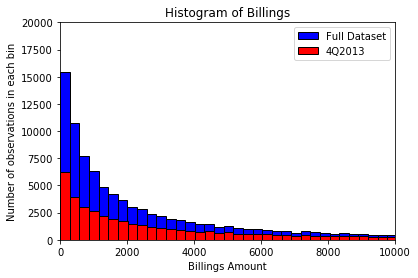

In [54]:
# matplotlib histogram

import matplotlib.pyplot as plt

plt.hist(df_dups_dropped['Billings'], color='blue', edgecolor='black',
         bins = 10000, label='Full Dataset')

plt.hist(Q42013_dups_dropped['Billings'], color ='red', edgecolor='black',
         bins = 10000, label='4Q2013')

plt.legend(prop={'size': 10})
plt.xlim(0, 10000)
plt.ylim(0, 20000)


plt.title('Histogram of Billings')
plt.xlabel('Billings Amount')
plt.ylabel('Number of observations in each bin');

In [17]:
dur = df[df['Start Date'] < '2013-10-01']

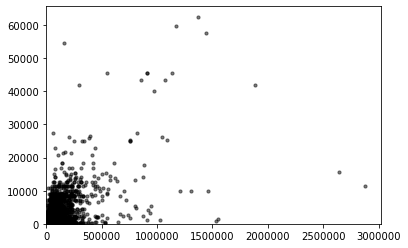

In [18]:
plt.scatter(df_dups_dropped['Billings'], df_dups_dropped['Units Sold'], s=10, c='black', alpha=0.5)
plt.xlim(0, )
plt.ylim(0, )
plt.show()

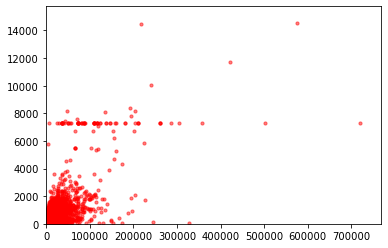

In [19]:
plt.scatter(dur['Billings'], dur['Units Sold'], s=10, c='red', alpha=0.5)
plt.xlim(0, )
plt.ylim(0, )
plt.show()

### Adjust for missing data in Oct 20-30, 2013 for the Local Segment

For the missing data in October, I plan to look at the raw data from 2012 and see how those 10 days performed relative to the 10 days before and 10 days after (Septembet 29-October 9 and October 31-November 9, respectively). Then I will impose that relative difference in date range for 2013, using the 10 days before and after to adjust the local segment billings for 2013.

#### Looking at the difference in 10 day segments: 2012

In [20]:
# Billing for local segment october 20-30

billings_2012_oct20_to_oct30 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2012-10-20') 
                                               & (df_dups_dropped['Start Date'] <= '2012-10-30')]

billings_2012_oct20_to_oct30_local = billings_2012_oct20_to_oct30[billings_2012_oct20_to_oct30
                                                                  .Segment.str.contains('Local')]

# Billing for local segment oct 9-oct 19

billings_2012_oct9_to_oct19 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2012-10-09') 
                                               & (df_dups_dropped['Start Date'] <= '2012-10-19')]

billings_2012_oct9_to_oct19_local = billings_2012_oct9_to_oct19[billings_2012_oct9_to_oct19
                                                                  .Segment.str.contains('Local')]

# Billing for local segment oct31-nov10

billings_2012_oct31_to_nov10 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2012-10-31') 
                                               & (df_dups_dropped['Start Date'] <= '2012-11-10')]

billings_2012_oct31_to_nov10_local = billings_2012_oct31_to_nov10[billings_2012_oct31_to_nov10
                                                                  .Segment.str.contains('Local')]

In [21]:
billings_2012_oct20_to_oct30_local.shape, billings_2012_oct9_to_oct19_local.shape, billings_2012_oct31_to_nov10_local.shape


((405, 7), (315, 7), (420, 7))

In [22]:
x = billings_2012_oct20_to_oct30_local.groupby(['Segment']).mean()
x

,Units Sold,Billings
Segment,,
Local,101.640741,4309.922099


In [23]:
y = billings_2012_oct9_to_oct19_local.groupby(['Segment']).mean()
y

,Units Sold,Billings
Segment,,
Local,82.194603,3957.471905


In [24]:
z = billings_2012_oct31_to_nov10_local.groupby(['Segment']).mean()
z

,Units Sold,Billings
Segment,,
Local,87.787143,3750.52369


In [25]:
difference = x.iloc[0][1]/z.iloc[0][1]

print(f'Billings for Local was about {difference: .2f} times higher in the 10 day range')
print('from October 20-30 in 2012 than the preceeding 10 days, from october 9 to 19.')

Billings for Local was about  1.15 times higher in the 10 day range
from October 20-30 in 2012 than the preceeding 10 days, from october 9 to 19.


In [26]:
difference = x.iloc[0][1]/y.iloc[0][1]

print(f'Billings for Local was about {difference: .2f} times higher in the 10 day range')
print('from October 20-30 in 2012 than the preceeding 10 days, from october 9 to 19.')

Billings for Local was about  1.09 times higher in the 10 day range
from October 20-30 in 2012 than the preceeding 10 days, from october 9 to 19.


In October 20-30, 2012, the Local Segment actually outperformed the preceeding 10 days and proceeding 10 dates by about 9% and 15% respectively. In adjusting the missing values for 2013, I will use the aadjust according the to average difference between the two weeks and oct 20-30

In [27]:
difference = x.iloc[0][1]/((z.iloc[0][1]+y.iloc[0][1])/2)

print(f'Billings for Local was about {difference: .2f} times higher in the 10 day range')
print('from October 20-30 in 2012 than the average of the 10 days prior and after.')

Billings for Local was about  1.12 times higher in the 10 day range
from October 20-30 in 2012 than the average of the 10 days prior and after.


#### Looking at the difference in 10 day segments: 2013

In [28]:
# Billing for local segment october 20-30

billings_2013_oct20_to_oct30 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2013-10-20') 
                                               & (df_dups_dropped['Start Date'] <= '2013-10-30')]

billings_2013_oct20_to_oct30_local = billings_2013_oct20_to_oct30[billings_2013_oct20_to_oct30
                                                                  .Segment.str.contains('Local')]

# Billing for local segment sept 29-oct 9

billings_2013_sept29_to_oct9 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2013-09-29') 
                                               & (df_dups_dropped['Start Date'] <= '2013-10-09')]

billings_2013_sept29_to_oct9_local = billings_2013_sept29_to_oct9[billings_2013_sept29_to_oct9
                                                                  .Segment.str.contains('Local')]

# Billing for local segment oct31-nov10

billings_2013_oct31_to_nov10 = df_dups_dropped[(df_dups_dropped['Start Date'] >= '2013-10-31') 
                                               & (df_dups_dropped['Start Date'] <= '2013-11-10')]

billings_2013_oct31_to_nov10_local = billings_2013_oct31_to_nov10[billings_2013_oct31_to_nov10
                                                                  .Segment.str.contains('Local')]

In [29]:
billings_2013_oct20_to_oct30_local.shape, billings_2013_sept29_to_oct9_local.shape, billings_2013_oct31_to_nov10_local.shape

((0, 7), (4826, 7), (4922, 7))

In [30]:
x = billings_2013_sept29_to_oct9_local.groupby(['Segment']).sum()
x

,Units Sold,Billings
Segment,,
Local,1131673.1,3.119235e+07


In [31]:
y = billings_2013_oct31_to_nov10_local.groupby(['Segment']).sum()
y

,Units Sold,Billings
Segment,,
Local,1302199.2,3.307915e+07


#### Making the adjustment to account for the missing data

In [32]:
# Now I will make the %12 adjustment that I put together from the 2012 data.

oct_missing_values = ((y.iloc[0][1] + x.iloc[0][1]) / 2) * difference
oct_missing_values

35937374.21600697

In [33]:
# Lets now add the adjusted October billing and find the total.

total_billing_Q42013 = Q42013_dups_dropped.groupby(['Segment']).sum()
total_billing_Q42013.iloc[1][1] = total_billing_Q42013.iloc[1][1] + oct_missing_values
total_billing_Q42013

,Units Sold,Billings
Segment,,
Goods,9.952459e+06,2.722459e+08
Local,7.855128e+06,2.466582e+08
Travel,3.660306e+05,6.750610e+07


In [34]:
s = total_billing_Q42013.xs('Travel')
s.name = 'Total'
total_billing_Q42013 = total_billing_Q42013.append(s)

In [35]:
total_billing_Q42013.iloc[3][0] = total_billing_Q42013.iloc[0][0] + total_billing_Q42013.iloc[1][0] + total_billing_Q42013.iloc[2][0]
total_billing_Q42013.iloc[3][1] = total_billing_Q42013.iloc[0][1] + total_billing_Q42013.iloc[1][1] + total_billing_Q42013.iloc[2][1]
total_billing_Q42013

,Units Sold,Billings
Segment,,
Goods,9.952459e+06,2.722459e+08
Local,7.855128e+06,2.466582e+08
Travel,3.660306e+05,6.750610e+07
Total,1.817362e+07,5.864103e+08


### Total billing by segment

In [36]:
# Totals out of scientific notation

pd.options.display.float_format = '{:.2f}'.format
total_billing_Q42013

,Units Sold,Billings
Segment,,
Goods,9952459.17,272245945.89
Local,7855128.45,246658220.46
Travel,366030.60,67506103.77
Total,18173618.22,586410270.12


In [37]:
# Split 4Q2013 into oct, nov, dec.

october = Q42013_dups_dropped[(Q42013_dups_dropped['Start Date'] >= '2013-10-01') 
                              & (Q42013_dups_dropped['Start Date'] <= '2013-10-31')]
november = Q42013_dups_dropped[(Q42013_dups_dropped['Start Date'] >= '2013-11-01') 
                              & (Q42013_dups_dropped['Start Date'] <= '2013-11-30')]
december = Q42013_dups_dropped[(Q42013_dups_dropped['Start Date'] >= '2013-12-01') 
                              & (Q42013_dups_dropped['Start Date'] <= '2013-12-31')]

# Group by segment showing the total of each segment for each month

oct_billing = (october.groupby('Segment').sum()).drop(columns='Units Sold')
nov_billing = (november.groupby('Segment').sum()).drop(columns='Units Sold')
dec_billing = (december.groupby('Segment').sum()).drop(columns='Units Sold')

# Adding a Total row.

oct_total = oct_billing.iloc[0][0] + oct_billing.iloc[1][0] + oct_billing.iloc[2][0] + oct_missing_values
nov_total = nov_billing.iloc[0][0] + nov_billing.iloc[1][0] + nov_billing.iloc[2][0]
dec_total = dec_billing.iloc[0][0] + dec_billing.iloc[1][0] + dec_billing.iloc[2][0]
index = ['Goods', 'Local', 'Travel', 'Total']

# Creating the dataframe.

by_month = pd.DataFrame(data={'October': [oct_billing.iloc[0][0], oct_billing.iloc[1][0], oct_billing.iloc[2][0], oct_total],
                             'November': [nov_billing.iloc[0][0], nov_billing.iloc[1][0], nov_billing.iloc[2][0], nov_total],
                             'December': [dec_billing.iloc[0][0], dec_billing.iloc[1][0], dec_billing.iloc[2][0], dec_total],
                             'Segment': index})
billings_by_month = by_month.set_index('Segment')

# Adding commas for readability.

pd.options.display.float_format = '{:,.0f}'.format

billings_by_month

,October,November,December
Segment,,,
Goods,"61,848,881","112,892,110","97,504,956"
Local,"59,235,033","90,662,147","60,823,666"
Travel,"20,229,532","24,637,104","22,639,468"
Total,"177,250,819","228,191,361","180,968,090"


### Additional Data Exploration (didn't lead to anything)

#### "Deal ID" Beginning with two characters then a dash.

I found all of the instances of -<number>. I originally thought the number signified the nth deal that company had with Groupon. I'm now seeing that some companies have their addresses or some other intentional number in the comapny name. It's also troubling for my theory that there aren't necessarily the same number of the company listed from 1 to n (n being the largest number after the company name). 

In [38]:
# It looks like the same company introduces a new deal 
# it is counted as the same name with a number at the end.

df['Deal ID'].str.contains('the-vanity-center').value_counts()

False    138529
True          5
Name: Deal ID, dtype: int64

In [39]:
# Make a list of all observations that begin with -<number> in the "Deal ID" column.

l = []
for i in range(1000):
    for _ in df['Deal ID']:
        if _.endswith('-' + str(i)):
            l.append(_)

In [40]:
len(l)

56011

In [42]:
l[56000:]

['crossfit-826',
 'smoothie-king-840',
 'crossfit-860',
 'salon-862',
 'megan-pelfrey-at-salon-909',
 'poop-911',
 'crossfit-915',
 'gg-double-power-9-dual-core-android-tablet-gs-918',
 'salon-944',
 'cross-fit-946',
 'crosscore-956']

In [43]:
yo = []
for i in df['Deal ID']:
    try: 
        if i.index('-', 2, 3):
            yo.append(i)
    except ValueError:
        pass
yall = []
for i in yo:
    yall.append(i[:2])

In [44]:
len(set(yall))

508

In [45]:
yort = pd.DataFrame(data={'test': yall})
yort.test.value_counts().head()

gg    15234
gl     2911
ga     2724
it     1392
la      423
Name: test, dtype: int64

In [46]:
# How many companies start with gg-? What does it mean?
# Most of them correspond to "First - Party" and "Goods" under "Deal ID" and "Inventory Type", respectively.

print(df[(df['Deal ID'].str.startswith('gg-'))].shape)
df[(df['Deal ID'].str.startswith('gg-'))].head()

(15234, 7)


,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
1542,gg-two-lumps-of-sugar-aprons,664,"12,444",2012-10-30,http://www.groupon.com/deals/gg-two-lumps-of-s...,Goods,First - Party
12112,gg-ca-breda-mens-watches,-0,-0,2013-03-25,http://www.groupon.com/deals/gg-ca-breda-mens-...,Goods,First - Party
12113,gg-ca-betsey-johnson-belted-cape,7,287,2013-03-25,http://www.groupon.com/deals/gg-ca-betsey-john...,Goods,First - Party
12114,gg-ca-womens-fleece-pajama-pants,0,0,2013-03-25,http://www.groupon.com/deals/gg-ca-womens-flee...,Goods,First - Party
12171,gg-ca-cejon-muffler-scarves,8,67,2013-03-26,http://www.groupon.com/deals/gg-ca-cejon-muffl...,Goods,First - Party


In [47]:
# 14623/15234 have "First - Party" under "Inventory Type"

df[(df['Deal ID'].str.startswith('gg-') & df['Inventory Type'].str.contains('First - Party'))].shape

(14623, 7)

In [48]:
# All observations listed as "Goods" under "segment" start with 'gg-''

df[(df['Deal ID'].str.startswith('gg-') & df['Segment'].str.contains('Goods'))].shape

(15234, 7)

In [49]:
# How many companies start with gl? What does it mean? Local?

print(df[(df['Deal ID'].str.startswith('gl-'))].shape)
df[(df['Deal ID'].str.startswith('gl-'))].head()

(2911, 7)


,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
337,gl-friday-night-live,25,285,2012-09-29,http://www.groupon.com/deals/gl-friday-night-live,Local,Third - Party
4526,gl-clinic-1,33,"4,872",2012-12-30,http://www.groupon.com/deals/gl-clinic-1,Local,Third - Party
4924,gl-clinic-2,98,"14,617",2013-01-07,http://www.groupon.com/deals/gl-clinic-2,Local,Third - Party
6174,gl-shades-of-sinatra-las-vegas-1,177,"6,575",2013-01-29,http://www.groupon.com/deals/gl-shades-of-sina...,Local,Third - Party
11567,gl-opening-night-race,0,0,2013-03-21,http://www.groupon.com/deals/gl-opening-night-...,Local,Third - Party


In [50]:
# All Deal IDs that start with "gl-" have "local" for their segment

df[(df['Deal ID'].str.startswith('gl-') & df['Segment'].str.contains('Local'))].shape

(2911, 7)

In [51]:
# They also all have "Third - Party" for their Inventory Type

df[(df['Deal ID'].str.startswith('gl-') & df['Inventory Type'].str.contains('Third - Party'))].shape

(2911, 7)

In [52]:
# But there are far more Local segment types than that! What does gl- mean?

df[(df['Segment'].str.contains('Local'))].shape

(120576, 7)

Notes for tomorrow
- Morgan Stanely is way off in their predictions (page 9). They are very optimistic about growth in local sales. Their estimate is like 300 higher than what I got. 